In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City
0,211131,85123A,kreations_YI 06-L,1,07-01-16,1950.0,1.0,Lahor
1,211133,71053,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,1,07-01-16,240.0,2.0,Lahor
2,211134,84406B,Ego_UP0017-999-MR0,1,07-01-16,2450.0,3.0,Lahor
3,211135,84029G,kcc_krone deal,1,07-01-16,360.0,4.0,Lahor
4,211136,84029E,BK7010400AG,2,07-01-16,555.0,5.0,Lahor


In [4]:
df.shape

(584524, 8)

In [5]:
#Null values.

In [6]:
df.isnull().any()
df.isnull().sum()


df.isna().sum()

InvoiceNo       0
StockCode       0
Description    20
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     11
City            0
dtype: int64

In [7]:
df = df.dropna()

In [8]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City
0,211131,85123A,kreations_YI 06-L,1,07-01-16,1950.0,1.0,Lahor
1,211133,71053,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,1,07-01-16,240.0,2.0,Lahor
2,211134,84406B,Ego_UP0017-999-MR0,1,07-01-16,2450.0,3.0,Lahor
3,211135,84029G,kcc_krone deal,1,07-01-16,360.0,4.0,Lahor
4,211136,84029E,BK7010400AG,2,07-01-16,555.0,5.0,Lahor


In [9]:
df.shape

(584493, 8)

In [10]:
#The most frequent value in a column (of a dataframe) below
cus_id_1 = df['CustomerID'].value_counts().idxmax()
cus_id_1

85775.0

In [11]:
#The amount of the most frequent value
cus_id_2 = df['CustomerID'].value_counts().max()
cus_id_2

2524

In [12]:
#Unique values in the dataframe
df.nunique()

InvoiceNo      584489
StockCode        4070
Description     84888
Quantity           74
InvoiceDate       789
UnitPrice        9121
CustomerID     115323
City                7
dtype: int64

In [13]:
#Indexing

In [14]:
bought_jul_2016 = df.loc[df['InvoiceDate'] == '07-01-2016']
bought_jul_2016.shape

(0, 8)

In [15]:
df.loc[df['InvoiceNo'] == '211149']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City


In [16]:
#Correlation function
df.corr() #Not really any correlation

C:\Users\hp\AppData\Local\Temp\ipykernel_4440\3620604836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Not really any correlation


,InvoiceNo,Quantity,UnitPrice,CustomerID
InvoiceNo,1.000000,0.033378,0.141593,0.780026
Quantity,0.033378,1.000000,-0.017628,0.025672
UnitPrice,0.141593,-0.017628,1.000000,0.156798
CustomerID,0.780026,0.025672,0.156798,1.000000


In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
City           0
dtype: int64

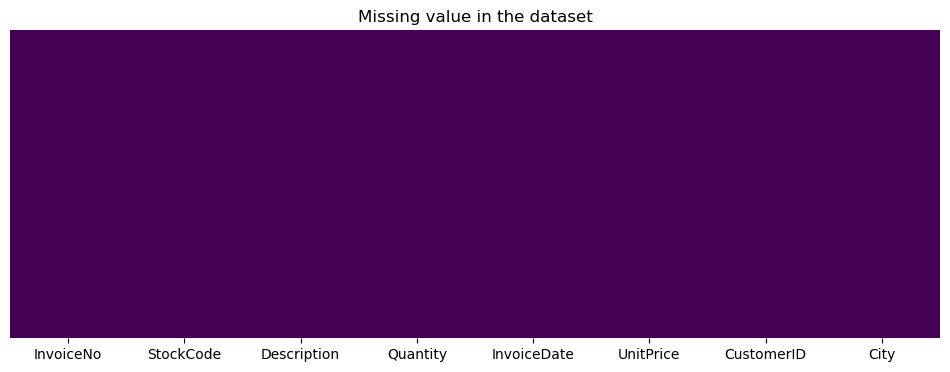

In [18]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [19]:
#Creating a new column with total cost of units (quantity * price) - added to dataframe
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

df['TotalPrice']

0           1950.0
1            240.0
2           2450.0
3            360.0
4           1110.0
            ...   
584519       699.0
584520     35599.0
584521    259998.0
584522    174600.0
584523    217280.0
Name: TotalPrice, Length: 584493, dtype: float64

In [20]:
#Drop duplicates 

df = df.drop_duplicates()
df.shape

(584493, 9)

In [21]:
cost_p_trans = df.groupby(['InvoiceNo'])['TotalPrice'].sum()
cost_p_trans

InvoiceNo
211131      1950.0
211133       240.0
211134      2450.0
211135       360.0
211136      1110.0
            ...   
905204       699.0
905205     35599.0
905206    259998.0
905207    174600.0
905208    217280.0
Name: TotalPrice, Length: 584489, dtype: float64

In [22]:
#data visualization
import matplotlib.pyplot as plt

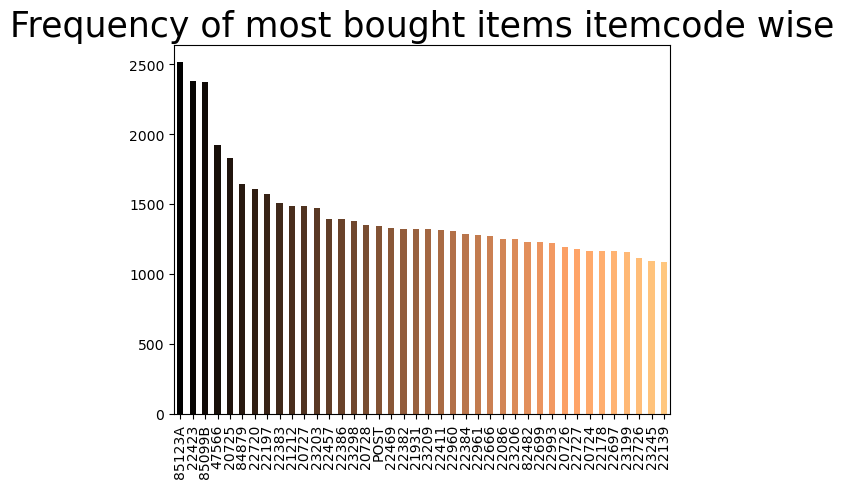

In [23]:
# plt.rcParams['figure.figsize'] = (18, 7) #the figure size. The only important is the (18, 7) as it's different than the default figure size
color = plt.cm.copper(np.linspace(0, 1, 40)) #importance: color 
df['StockCode'].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most bought items itemcode wise', fontsize=25)
plt.show()

In [24]:
#Tree map for most 50 popular items

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import squarify

In [26]:
y = df['Description'].value_counts().head(50).to_frame()
y.index

Index(['MATSAM59DB75ADB2F80', 'Al Muhafiz Sohan Halwa Almond', 'emart_00-7',
       'kcc_krone deal', 'infinix_Zero 4-Grey', 'emart_00-1',
       'MATSAM59DB757FB47A2', 'Rubian_U8 Smart Watch', 'unilever_Deal-6',
       'APPNAT5A0A01860CE92', 'MATSAM5A7463EE3C1A5', 'ENTECO5A7FE80D6C830',
       'RB_Household Bundle', 'Infinix Hot 4-Gold', 'MATTEL5A462528E403F',
       'Al Muhafiz Sohan Halwa Walnut', 'VIT5ABCCF7FDF973',
       'Telemall_MM-DR-HB-L', 'ENTNOB5A4633C950FAD', 'RS_Plain Rusk Pack of 3',
       'Infinix Hot 4-Black', 'RS_Habshi Halwa Tin', 'test-product-00',
       'ENTNOB5A14947A21475', 'RB_Veet-bf', 'MATIDR59BA510306FBE',
       'RUB_Rubian Zipper', 'RB_Harpic Loot Sale-bf', 'RS_Soan Papri-250gm',
       'BO_topfastRc-yellow', 'IDROID_BALRX7-Gold', 'RS_Plain Rusk',
       'MATSAM5A0BFFEF4DA20', 'MATINF59C9002EA6AF0',
       'IDROID_BALRX7-Jet black ', 'BO_shovel-truck-orange',
       'kcc_glamour deal', 'MATINF5A61FBB8820B3', 'MATINF5AE310D2D7A1A',
       'AYS_32B8500-32-I

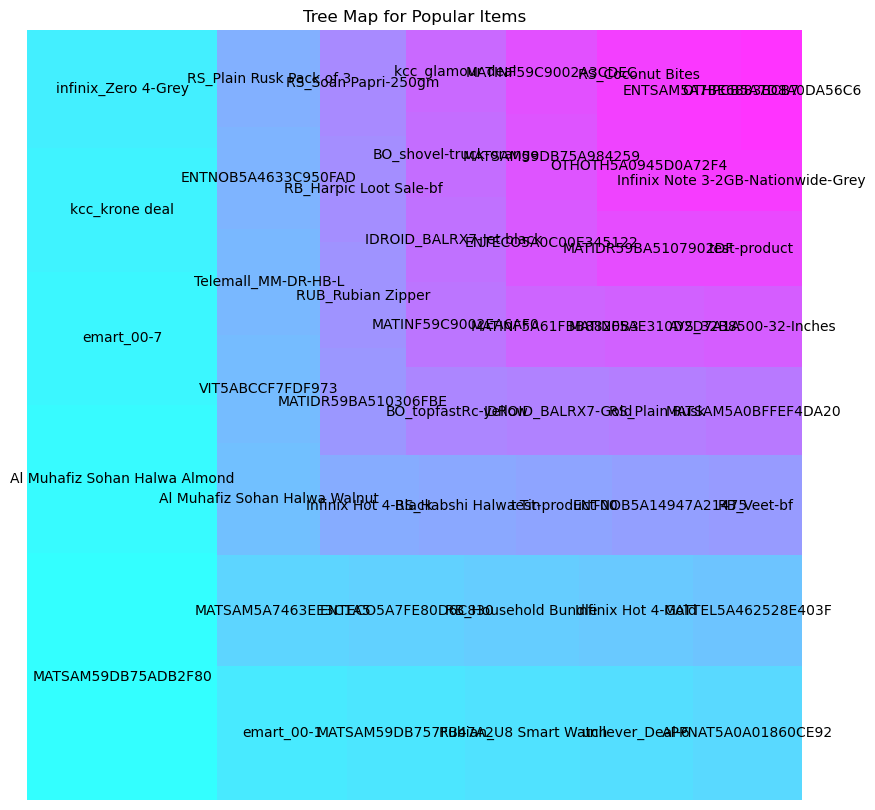

In [27]:
plt.rcParams['figure.figsize'] = (10, 10)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.rcParams.update({
    'font.size': 8, 
    })
plt.show()

In [28]:
df['City'].value_counts()[:5] #<- only selecting top 5


Lahor        494634
Quetta        30398
Karachi       20894
Multan        19944
Islamabad      9709
Name: City, dtype: int64

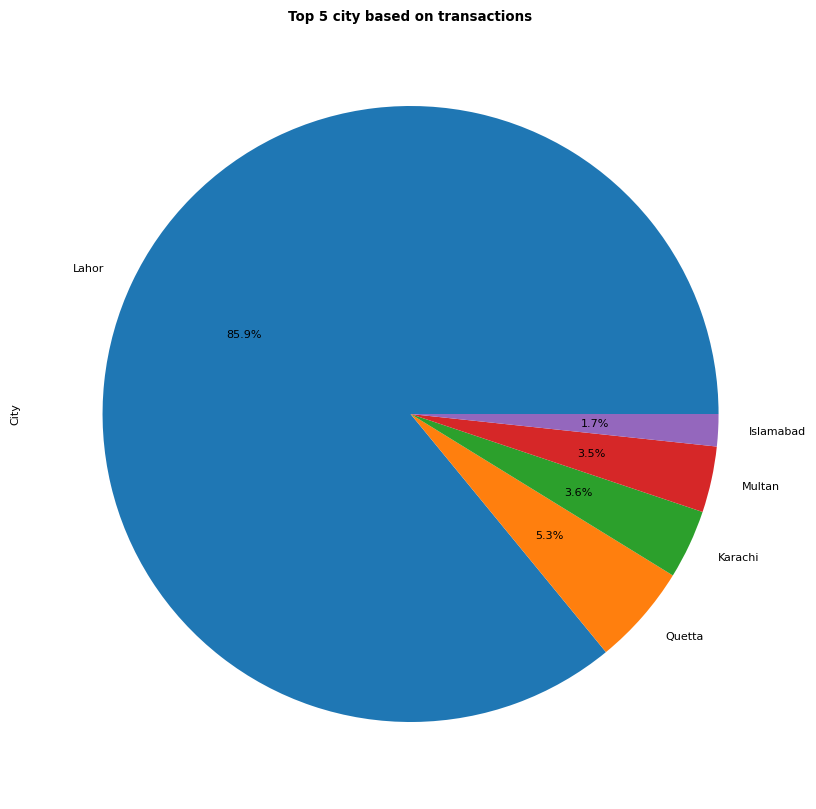

In [29]:
plt.figure()
df['City'].value_counts()[:5].plot(kind = 'pie', autopct='%1.1f%%') #autopct -> shows the percentage
#plt.pie(df['City'].value_counts()[:5], autopct='%1.1f%%')  #does the same thing but w/o the country labels
plt.title('Top 5 city based on transactions', weight='bold') #makes the title bold
plt.show()

In [30]:
Quantity = df.Quantity.value_counts()
max_Quantity=Quantity.head()
min_Quantity=Quantity.tail()

<Axes: >

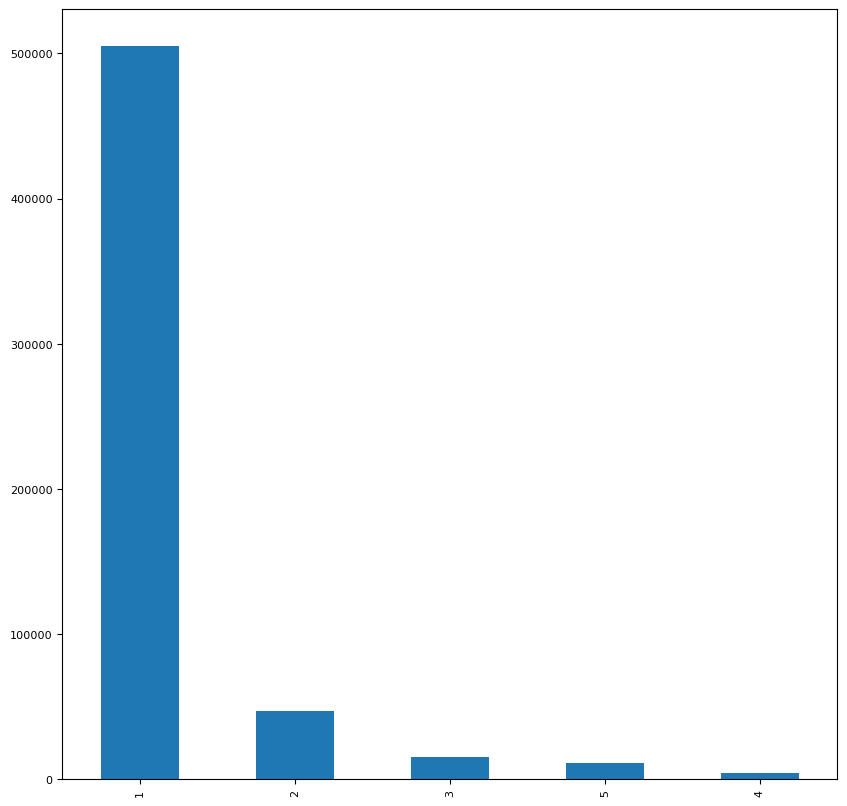

In [31]:
max_Quantity.plot.bar()

<Axes: >

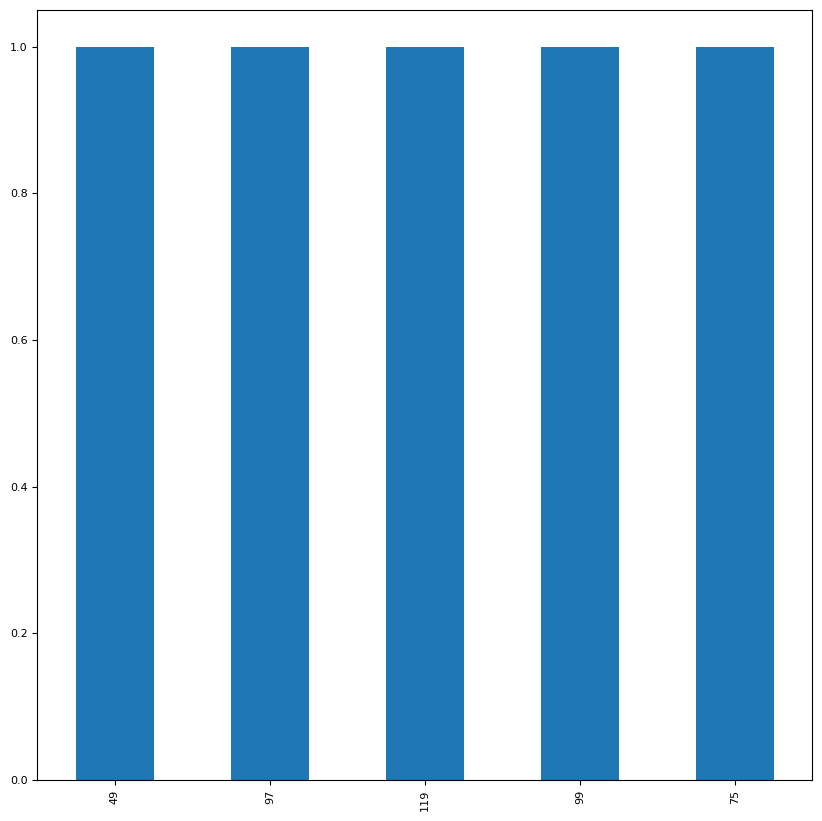

In [32]:
#No.of quantity
min_Quantity.plot.bar()

In [33]:
#Best city in terms of orders

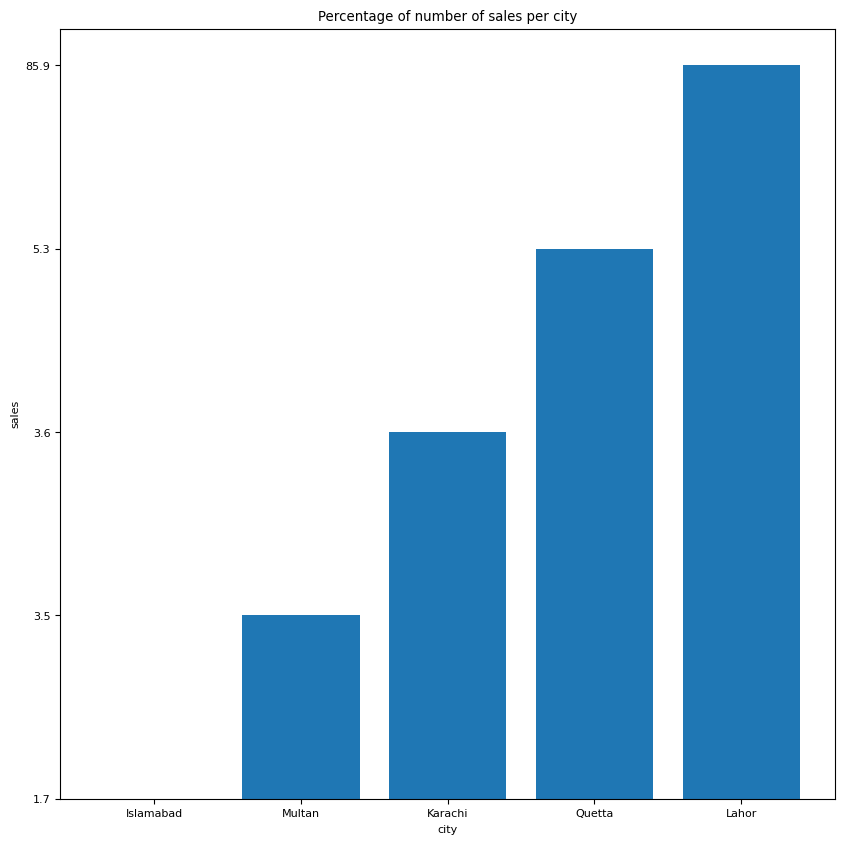

In [34]:
import matplotlib.pyplot as plt
city = ['Islamabad','Multan','Karachi','Quetta','Lahor']
sales = ['1.7','3.5','3.6', '5.3', '85.9']
plt.bar(city,sales)

plt.xlabel('city')
plt.ylabel('sales')
plt.title('Percentage of number of sales per city')
plt.show()

In [35]:
#Machine Learning - Predicting Quantity

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,City,TotalPrice
0,211131,85123A,kreations_YI 06-L,1,07-01-16,1950.0,1.0,Lahor,1950.0
1,211133,71053,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,1,07-01-16,240.0,2.0,Lahor,240.0
2,211134,84406B,Ego_UP0017-999-MR0,1,07-01-16,2450.0,3.0,Lahor,2450.0
3,211135,84029G,kcc_krone deal,1,07-01-16,360.0,4.0,Lahor,360.0
4,211136,84029E,BK7010400AG,2,07-01-16,555.0,5.0,Lahor,1110.0


In [37]:
#Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns


In [38]:
#X, y, and train_test_split

X = df[['UnitPrice','TotalPrice','CustomerID']]
y = df['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [39]:
X

,UnitPrice,TotalPrice,CustomerID
0,1950.0,1950.0,1.0
1,240.0,240.0,2.0
2,2450.0,2450.0,3.0
3,360.0,360.0,4.0
4,555.0,1110.0,5.0
...,...,...,...
584519,699.0,699.0,115320.0
584520,35599.0,35599.0,115326.0
584521,129999.0,259998.0,113474.0
584522,87300.0,174600.0,113474.0


In [40]:
#Average quantity

df['Quantity'].mean() 

1.2963765177683908

In [41]:
#Linear Regression

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
pred_reg = linreg.predict(X_test)
score_linreg_per = linreg.score(X_test, y_test) * 100
print(f'Linear Regression Model Score: {score_linreg_per}%')

Linear Regression Model Score: -5.218755685736087%


In [45]:
#Mean Absolute Error: LINREG

val_mae_linreg = mean_absolute_error(pred_reg, y_test)
print(f'The quantity is off by: {val_mae_linreg} (MAE)') # <- How much the prediction off quantity is off by

The quantity is off by: 0.48575506726505496 (MAE)


In [46]:
#Root mean square Error
rmse = np.sqrt(np.mean((pred_reg - y_test)**2))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 2.38


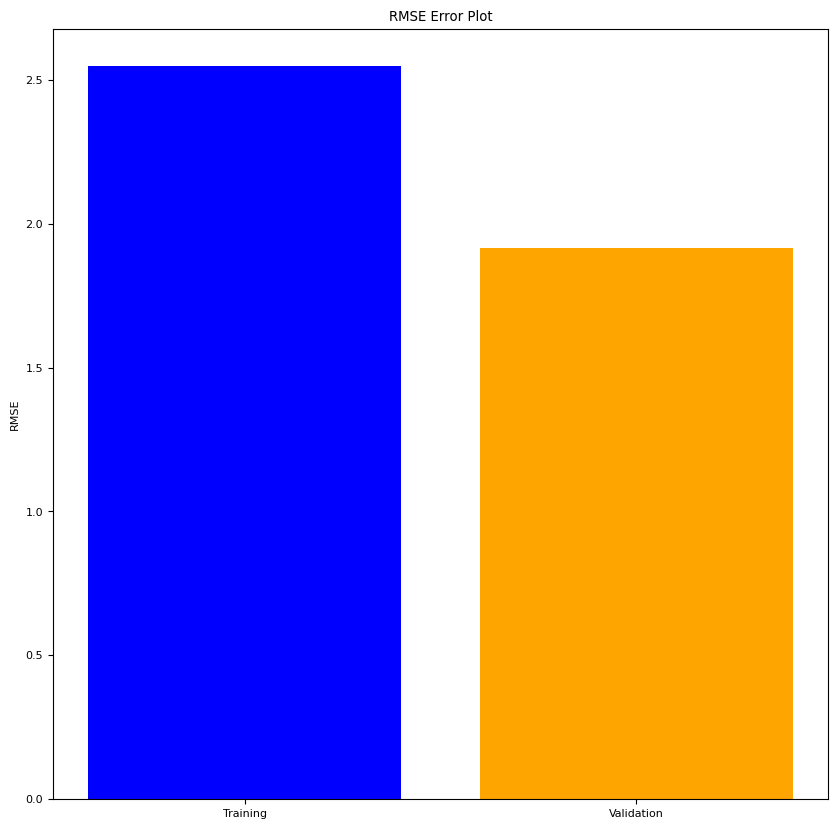

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and validation sets
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate RMSE for training and validation predictions
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Plot the RMSE values
plt.bar(['Training', 'Validation'], [rmse_train, rmse_val], color=['blue', 'orange'])
plt.ylabel('RMSE')
plt.title('RMSE Error Plot')
plt.show()

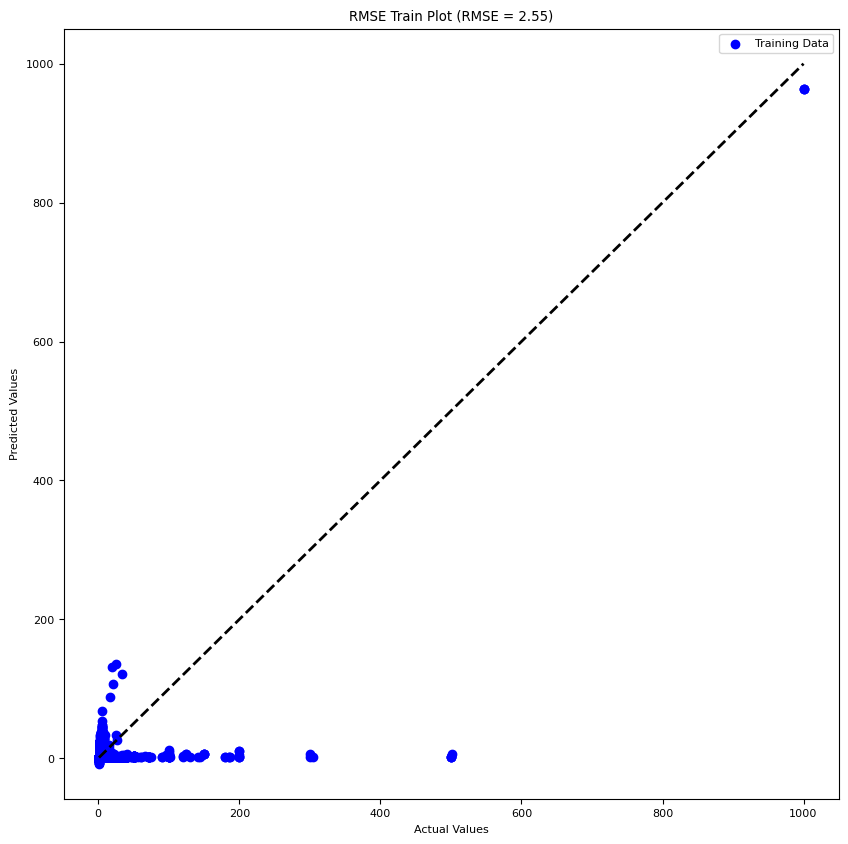

In [48]:
from sklearn.metrics import mean_squared_error
y_pred_train = linreg.predict(X_train)

# Calculate RMSE for the training predictions
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_train, y_pred_train, c='b', label='Training Data')

# Plot a diagonal line representing perfect predictions
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=2)

plt.title(f'RMSE Train Plot (RMSE = {rmse_train:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [49]:
#R-squared
from sklearn.metrics import r2_score
r2 = r2_score(pred_reg, y_test)

print(f"R-squared (Coefficient of Determination): {r2:.2f}")

R-squared (Coefficient of Determination): -6.17


In [50]:
#Cross validation: LINREG
cv_results_linreg = cross_val_score(linreg, X, y, cv=5) #this is important so that we're not dependent on the subjective number for our test size of our train_test_split
cv_results_linreg
np.mean(cv_results_linreg)

0.07272362512339454

In [51]:
#DecisionTreeRegressor

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 25  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 100  		 Mean Absolute Error:  0
Max leaf nodes: 250  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0


In [54]:
#Edit accordingly based on the best leaf nodes

dtr = DecisionTreeRegressor(max_leaf_nodes=500) # <- default number of lead nodes is unlimited

dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
score_dtr_per = dtr.score(X_test, y_test) * 100
print(f'Decision Tree Regressor Model Score: {score_dtr_per}%')

Decision Tree Regressor Model Score: 99.05855681797003%


In [55]:
#Mean average error Decision tree.

val_mae_dtr = mean_absolute_error(pred_dtr, y_test)
print(f'The quantity is off by: {val_mae_dtr} (MAE)')

The quantity is off by: 0.011348324665134458 (MAE)


In [166]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.03


In [167]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.87


In [56]:
#cross validation Decision tree.
cv_results_dtr = cross_val_score(dtr, X, y, cv=5) #this is important so that we're not dependent on the subjective number for our test size of our train_test_split
cv_results_dtr
np.mean(cv_results_dtr)

0.276438816237586

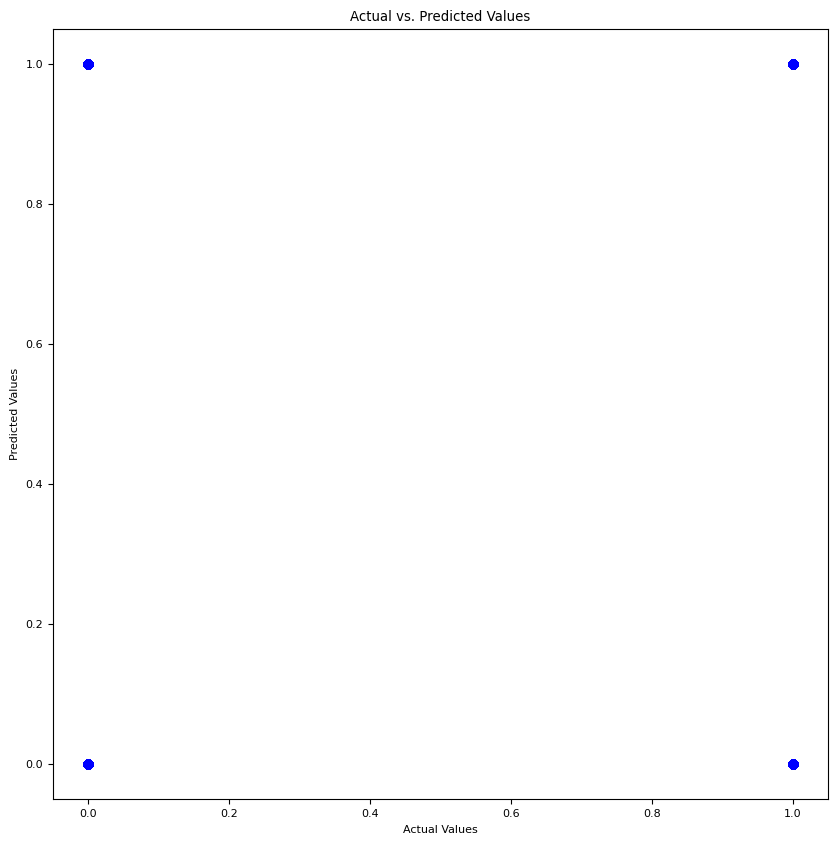

Mean Squared Error: 0.03
R-squared: 0.87


In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

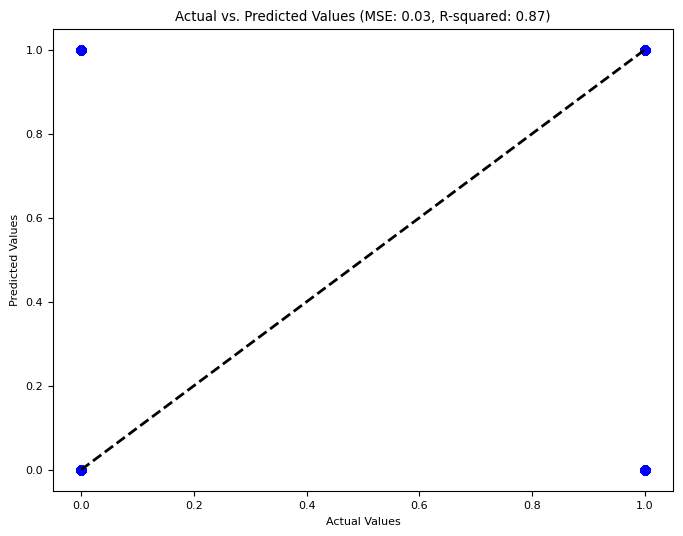

In [169]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Train the Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (MSE: {mse:.2f}, R-squared: {r2:.2f})')
plt.show()

In [111]:
#RandomForestRegressor

In [112]:
rfg = RandomForestRegressor()

rfg.fit(X_train, y_train)
pred_rfg = rfg.predict(X_test)
score_rfg_per = rfg.score(X_test, y_test) * 100
print(f'Random Forest Regressor Model Score: {score_rfg_per}%')

Random Forest Regressor Model Score: 93.2996450828068%


In [113]:
#Mean absolute error Random forest regressor.

val_mae_rfg = mean_absolute_error(pred_rfg, y_test)
print(f'The quantity is off by: {val_mae_rfg} (MAE)')

The quantity is off by: 0.03297429536803387 (MAE)


In [114]:
#cross validation random forest regressor.
cv_results_rfg = cross_val_score(dtr, X, y, cv=5) #this is important so that we're not dependent on the subjective number for our test size of our train_test_split
cv_results_rfg
np.mean(cv_results_rfg)

0.9311158800352957

In [ ]:
#Roc curve Random forest regressor

In [150]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [151]:
X, y = make_classification(n_samples=584524, n_features=8, random_state=93)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [153]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_probs = model.predict_proba(X_test)[:, 1]

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

In [155]:
auc_score = roc_auc_score(y_test, y_pred_probs)

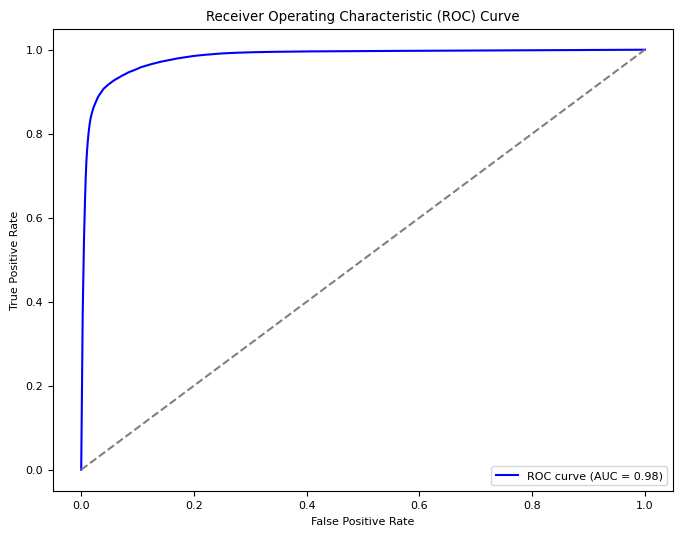

In [156]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

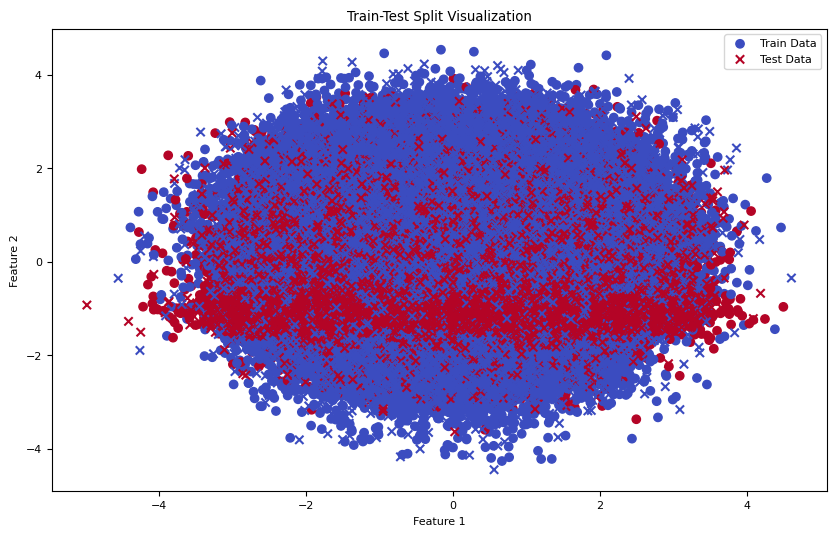

In [157]:
#Train Test Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test Data')
plt.title('Train-Test Split Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[87864     0]
 [    0 87494]]


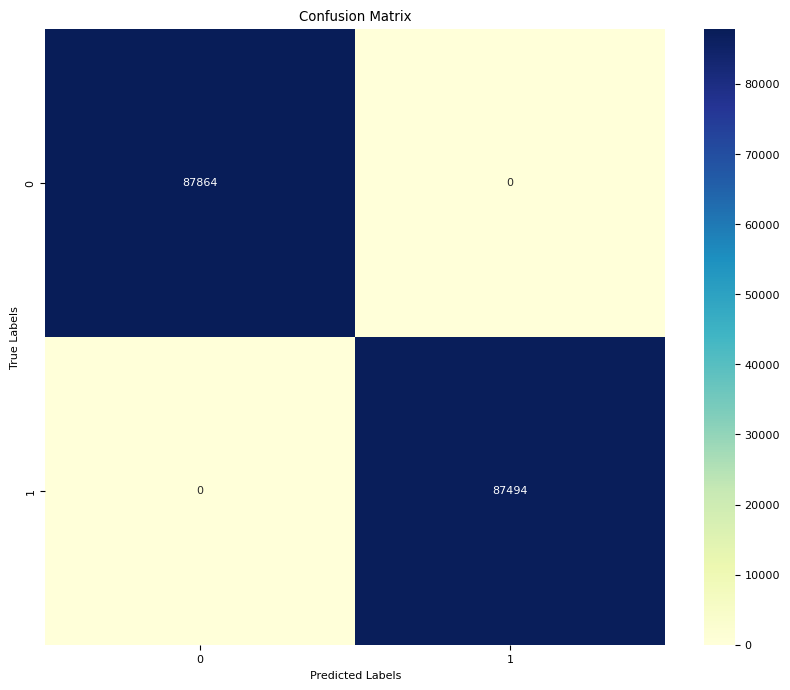

In [142]:
confusion_matrix_data =  [[87864,  0],
 [ 0, 87494]]

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [143]:
from sklearn.metrics import classification_report

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     87864
           1       0.87      0.84      0.85     87494

    accuracy                           0.86    175358
   macro avg       0.86      0.86      0.86    175358
weighted avg       0.86      0.86      0.86    175358

